<a href="https://colab.research.google.com/github/christiangarza1505813/PCD/blob/main/Tarea%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nltk
!pip install PyPDF2
!pip install emoji
!pip install wordcloud



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.4 MB/s eta 0:00:00


In [10]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem import PorterStemmer, WordNetLemmatizer
from PyPDF2 import PdfReader
from collections import Counter
from wordcloud import WordCloud
import emoji
import matplotlib.pyplot as plt

In [12]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:

# Subir archivos PDF
from google.colab import files
uploaded = files.upload()


Saving LibrodelMormon.pdf to LibrodelMormon.pdf
Saving Bilbia_nuevotestamento.pdf to Bilbia_nuevotestamento.pdf


In [34]:
# Función para leer texto desde PDF
def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return text


In [35]:
# Leer los textos de los dos PDFs
pdf_files = list(uploaded.keys())
text1 = extract_text_from_pdf(pdf_files[0])
text2 = extract_text_from_pdf(pdf_files[1])

In [59]:
# Función de limpieza y preprocesamiento de texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-ZáéíóúñüÁÉÍÓÚÑÜ\s]', '', text)
    # Tokenización
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('spanish')) #Limpieza de datos: eliminación de signos de puntuación, números, palabras vacías (stopwords).
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_tokens = [word for word in filtered_tokens if len(word) > 3]
    return filtered_tokens

# Preprocesar los textos
tokens1 = preprocess_text(text1)
tokens2 = preprocess_text(text2)


In [60]:
# Analizar estadísticas descriptivas básicas
def analyze_statistics(tokens, text_name):
    print(f"--- Estadísticas para {text_name} ---")
    print(f"Número total de palabras: {len(tokens)}")
    print(f"Número de palabras únicas: {len(set(tokens))}")
    print(f"Promedio de longitud de palabras: {sum(len(word) for word in tokens) / len(tokens):.2f}")

# Aplicar análisis a cada texto
analyze_statistics(tokens1, pdf_files[0])
analyze_statistics(tokens2, pdf_files[1])

--- Estadísticas para LibrodelMormon.pdf ---
Número total de palabras: 251443
Número de palabras únicas: 24124
Promedio de longitud de palabras: 6.62
--- Estadísticas para Bilbia_nuevotestamento.pdf ---
Número total de palabras: 86504
Número de palabras únicas: 13472
Promedio de longitud de palabras: 6.47


In [61]:
# Frecuencia de palabras
def analyze_frequencies(tokens, text_name, n=20):
    print(f"\n--- Frecuencia de palabras más comunes en {text_name} ---")
    freq_dist = FreqDist(tokens)
    for word, freq in freq_dist.most_common(n):
        print(f"{word}: {freq}")

# Aplicar análisis de frecuencia
analyze_frequencies(tokens1, pdf_files[0])
analyze_frequencies(tokens2, pdf_files[1])


--- Frecuencia de palabras más comunes en LibrodelMormon.pdf ---
dios: 3863
señor: 3277
tierra: 2590
alma: 2438
aquí: 2189
pueblo: 2020
cosas: 1475
iglesia: 1275
espíritu: 1153
padre: 1085
todas: 1058
hijo: 1043
hombre: 1039
hijos: 1000
cristo: 984
hombres: 980
nefi: 912
véase: 907
toda: 889
ahora: 865

--- Frecuencia de palabras más comunes en Bilbia_nuevotestamento.pdf ---
dios: 1680
jesús: 998
dijo: 980
señor: 769
juan: 594
entonces: 590
cristo: 557
sino: 530
hijo: 527
espíritu: 473
pues: 467
jesucristo: 460
cosas: 460
padre: 444
hombre: 417
mateo: 380
diciendo: 300
aquí: 295
tierra: 293
vida: 281


In [63]:
# Generar n-gramas
def analyze_ngrams(tokens, n, text_name):
    print(f"\n--- {n}-gramas más comunes en {text_name} (con stemming) ---")
    ngram_counts = Counter(ngrams(tokens, n))
    for ngram, count in ngram_counts.most_common(10):
        print(f"{' '.join(ngram)}: {count}")

# Aplicar análisis de n-gramas
analyze_ngrams(tokens1, 2, pdf_files[0])  # Bigramas
analyze_ngrams(tokens2, 2, pdf_files[1])  # Bigramas


--- 2-gramas más comunes en LibrodelMormon.pdf (con stemming) ---
josé smith: 517
todas cosas: 489
alma alma: 396
ahora bien: 396
espíritu santo: 395
señor dios: 334
libro mormón: 298
cierto digo: 271
doctrina convenios: 267
dice señor: 252

--- 2-gramas más comunes en Bilbia_nuevotestamento.pdf (con stemming) ---
jesús dijo: 168
espíritu santo: 156
todas cosas: 155
hijo hombre: 107
reino dios: 92
vida eterna: 86
señor jesucristo: 79
cierto digo: 77
cristo jesús: 69
capítulo jesús: 64


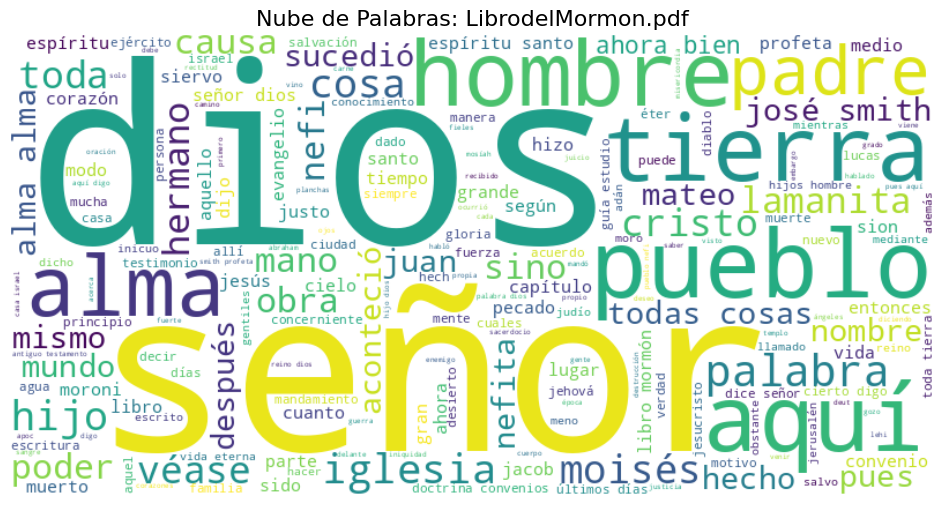

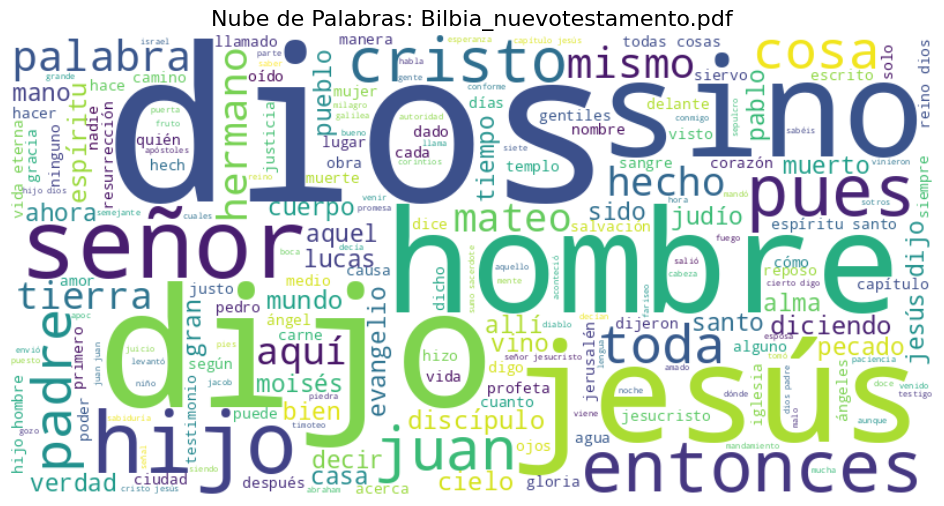

In [64]:
# Generar nubes de palabras
def generate_wordcloud(tokens, text_name):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate(" ".join(tokens))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Nube de Palabras: {text_name}", fontsize=16)
    plt.axis('off')
    plt.show()

# Crear nubes de palabras
generate_wordcloud(tokens1, pdf_files[0])
generate_wordcloud(tokens2, pdf_files[1])

In [65]:
# Análisis de signos de puntuación
def analyze_punctuation(text, text_name):
    punctuation = re.findall(r'[^\w\s]', text)
    punctuation_freq = Counter(punctuation)
    print(f"\n--- Frecuencia de signos de puntuación en {text_name} ---")
    for punct, freq in punctuation_freq.items():
        print(f"{punct}: {freq}")

# Aplicar análisis de signos de puntuación
analyze_punctuation(text1, pdf_files[0])
analyze_punctuation(text2, pdf_files[1])


--- Frecuencia de signos de puntuación en LibrodelMormon.pdf ---
,: 48750
.: 46949
©: 1
/: 3
:: 23736
—: 1609
;: 15621
-: 4301
“: 259
”: 229
(: 2812
–: 8942
): 2812
[: 36
]: 36
‘: 12
’: 15
­: 13735
¡: 481
!: 481
¿: 781
?: 780
*: 12
·: 14
➢: 9
■: 1
●: 1
°: 2

--- Frecuencia de signos de puntuación en Bilbia_nuevotestamento.pdf ---
.: 18173
—: 962
,: 17820
(: 341
): 342
:: 7125
“: 34
”: 34
;: 3904
–: 2122
­: 5451
¿: 1022
?: 1024
-: 294
¡: 283
!: 284
[: 34
]: 34
=: 2
*: 4


#Stemming

In [90]:
stemmer = PorterStemmer()

# Función de limpieza y preprocesamiento con stemming
def preprocess_text_with_stemming(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-ZáéíóúñüÁÉÍÓÚÑÜ\s]', '', text)
    # Tokenización
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('spanish')) #Limpieza de datos: eliminación de signos de puntuación, números, palabras vacías (stopwords).
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Aplicar stemming
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens if len(word) > 3]
    return stemmed_tokens

# Preprocesar los textos con stemming
stemmed_tokens1 = preprocess_text_with_stemming(text1)
stemmed_tokens2 = preprocess_text_with_stemming(text2)

In [91]:
# Analizar estadísticas descriptivas básicas
def analyze_statistics(tokens, text_name):
    print(f"--- Estadísticas para {text_name} ---")
    print(f"Número total de palabras: {len(tokens)}")
    print(f"Número de palabras únicas: {len(set(tokens))}")
    print(f"Promedio de longitud de palabras: {sum(len(word) for word in tokens) / len(tokens):.2f}")

# Aplicar análisis a cada texto
analyze_statistics(stemmed_tokens1, pdf_files[0])
analyze_statistics(stemmed_tokens2, pdf_files[1])

--- Estadísticas para LibrodelMormon.pdf ---
Número total de palabras: 251443
Número de palabras únicas: 21339
Promedio de longitud de palabras: 6.25
--- Estadísticas para Bilbia_nuevotestamento.pdf ---
Número total de palabras: 86504
Número de palabras únicas: 12072
Promedio de longitud de palabras: 6.09


In [92]:
# Frecuencia de palabras
def analyze_frequencies(tokens, text_name, n=20):
    print(f"\n--- Frecuencia de palabras más comunes en {text_name} ---")
    freq_dist = FreqDist(tokens)
    for word, freq in freq_dist.most_common(n):
        print(f"{word}: {freq}")

# Aplicar análisis de frecuencia
analyze_frequencies(stemmed_tokens1, pdf_files[0])
analyze_frequencies(stemmed_tokens2, pdf_files[1])


--- Frecuencia de palabras más comunes en LibrodelMormon.pdf ---
dio: 3863
señor: 3280
tierra: 2724
alma: 2592
aquí: 2189
pueblo: 2073
hijo: 2043
hombr: 2026
toda: 1947
cosa: 1609
palabra: 1408
padr: 1406
iglesia: 1347
espíritu: 1272
santo: 1254
cristo: 988
nefi: 912
véase: 907
poder: 884
hermano: 877

--- Frecuencia de palabras más comunes en Bilbia_nuevotestamento.pdf ---
dio: 1680
jesú: 998
dijo: 980
señor: 777
hijo: 752
hombr: 689
juan: 594
entonc: 590
cristo: 561
toda: 547
padr: 536
sino: 530
cosa: 526
espíritu: 521
pue: 467
jesucristo: 460
santo: 381
mateo: 380
palabra: 363
hermano: 338


In [93]:
# Generar n-gramas
def analyze_ngrams(tokens, n, text_name):
    print(f"\n--- {n}-gramas más comunes en {text_name} (con stemming) ---")
    ngram_counts = Counter(ngrams(tokens, n))
    for ngram, count in ngram_counts.most_common(10):
        print(f"{' '.join(ngram)}: {count}")

# Aplicar análisis de n-gramas
analyze_ngrams(stemmed_tokens1, 2, pdf_files[0])  # Bigramas
analyze_ngrams(stemmed_tokens2, 2, pdf_files[1])  # Bigramas


--- 2-gramas más comunes en LibrodelMormon.pdf (con stemming) ---
josé smith: 517
toda cosa: 496
alma alma: 397
ahora bien: 396
espíritu santo: 395
señor dio: 334
libro mormón: 298
cierto digo: 271
doctrina convenio: 268
hijo hombr: 259

--- 2-gramas más comunes en Bilbia_nuevotestamento.pdf (con stemming) ---
jesú dijo: 168
espíritu santo: 156
toda cosa: 155
hijo hombr: 109
reino dio: 92
vida eterna: 86
señor jesucristo: 79
hijo dio: 78
cierto digo: 77
dio padr: 73


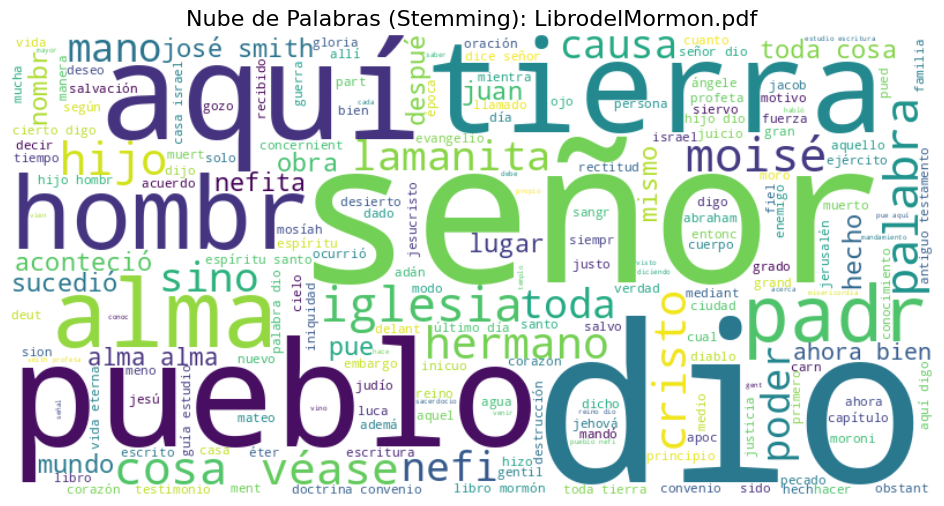

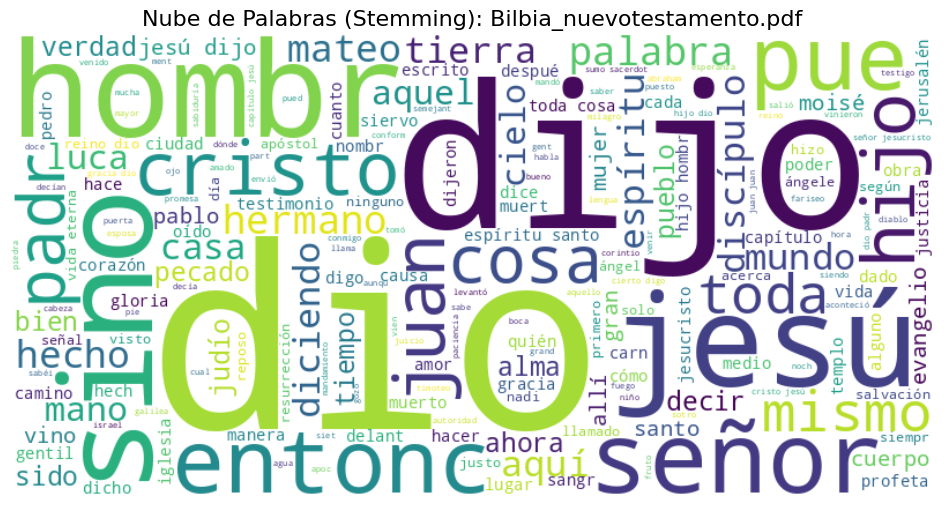

In [94]:
# Generar nubes de palabras
def generate_wordcloud(tokens, text_name):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate(" ".join(tokens))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Nube de Palabras (Stemming): {text_name}", fontsize=16)
    plt.axis('off')
    plt.show()

# Crear nubes de palabras
generate_wordcloud(stemmed_tokens1, pdf_files[0])
generate_wordcloud(stemmed_tokens2, pdf_files[1])

#Lemanización

In [84]:
lemmatizer = WordNetLemmatizer()


# Función de limpieza y preprocesamiento con stemming
def preprocess_text_with_lemma(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-ZáéíóúñüÁÉÍÓÚÑÜ\s]', '', text)
    # Tokenización
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('spanish')) #Limpieza de datos: eliminación de signos de puntuación, números, palabras vacías (stopwords).
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Aplicar stemming
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens if len(word) > 3]
    return lemmatized_tokens

# Preprocesar los textos con stemming
lemmatized_tokens1 = preprocess_text_with_lemma(text1)
lemmatized_tokens2 = preprocess_text_with_lemma(text2)

In [85]:


# Analizar estadísticas descriptivas básicas
def analyze_statistics(tokens, text_name):
    print(f"--- Estadísticas para {text_name} ---")
    print(f"Número total de palabras: {len(tokens)}")
    print(f"Número de palabras únicas: {len(set(tokens))}")
    print(f"Promedio de longitud de palabras: {sum(len(word) for word in tokens) / len(tokens):.2f}")

# Aplicar análisis a cada texto
analyze_statistics(lemmatized_tokens1, pdf_files[0])
analyze_statistics(lemmatized_tokens2, pdf_files[1])

--- Estadísticas para LibrodelMormon.pdf ---
Número total de palabras: 251443
Número de palabras únicas: 24016
Promedio de longitud de palabras: 6.60
--- Estadísticas para Bilbia_nuevotestamento.pdf ---
Número total de palabras: 86504
Número de palabras únicas: 13408
Promedio de longitud de palabras: 6.45


In [86]:

# Frecuencia de palabras
def analyze_frequencies(tokens, text_name, n=10):
    print(f"\n--- Frecuencia de palabras más comunes en {text_name} ---")
    freq_dist = FreqDist(tokens)
    for word, freq in freq_dist.most_common(n):
        print(f"{word}: {freq}")

# Aplicar análisis de frecuencia
analyze_frequencies(lemmatized_tokens1, pdf_files[0])
analyze_frequencies(lemmatized_tokens2, pdf_files[1])


--- Frecuencia de palabras más comunes en LibrodelMormon.pdf ---
dios: 3863
señor: 3277
tierra: 2590
alma: 2438
aquí: 2189
pueblo: 2073
hombre: 2019
toda: 1947
cosas: 1475
padre: 1399

--- Frecuencia de palabras más comunes en Bilbia_nuevotestamento.pdf ---
dios: 1680
jesús: 998
dijo: 980
señor: 769
hombre: 687
juan: 594
entonces: 590
cristo: 557
toda: 547
padre: 530


In [87]:
# Generar n-gramas
def analyze_ngrams(tokens, n, text_name):
    print(f"\n--- {n}-gramas más comunes en {text_name} (con stemming) ---")
    ngram_counts = Counter(ngrams(tokens, n))
    for ngram, count in ngram_counts.most_common(10):
        print(f"{' '.join(ngram)}: {count}")

# Aplicar análisis de n-gramas
analyze_ngrams(lemmatized_tokens1, 2, pdf_files[0])  # Bigramas
analyze_ngrams(lemmatized_tokens2, 2, pdf_files[1])  # Bigramas


--- 2-gramas más comunes en LibrodelMormon.pdf (con stemming) ---
josé smith: 517
toda cosas: 489
alma alma: 396
ahora bien: 396
espíritu santo: 395
señor dios: 334
libro mormón: 298
cierto digo: 271
doctrina convenios: 267
dice señor: 252

--- 2-gramas más comunes en Bilbia_nuevotestamento.pdf (con stemming) ---
jesús dijo: 168
espíritu santo: 156
toda cosas: 155
hijo hombre: 107
reino dios: 92
vida eterna: 86
señor jesucristo: 79
cierto digo: 77
cristo jesús: 69
dios padre: 68


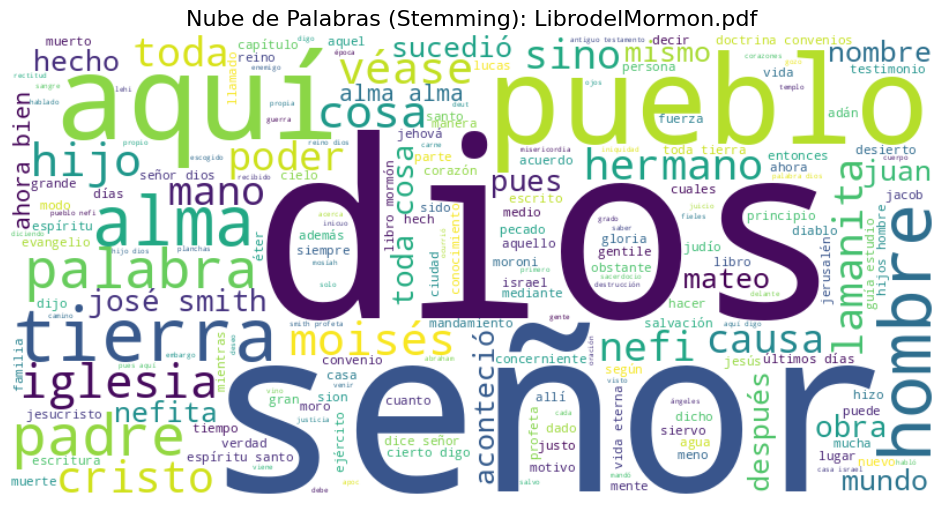

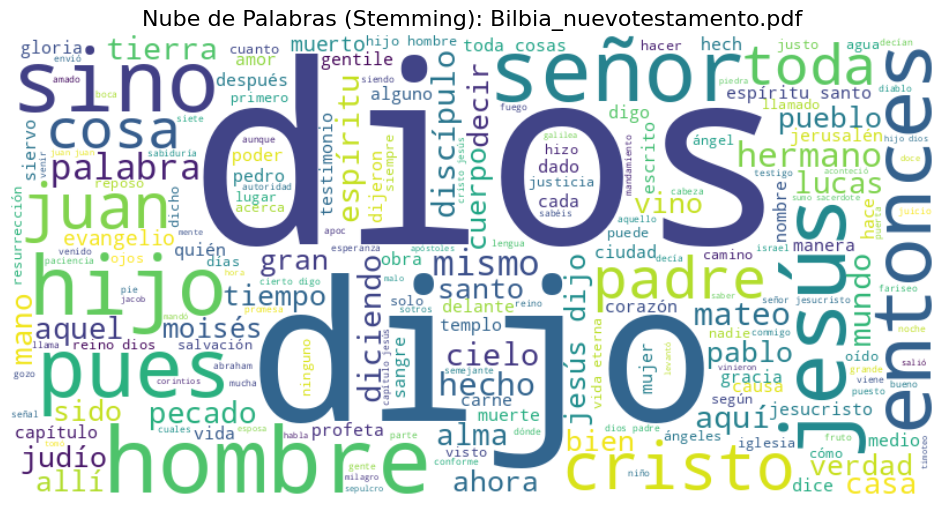

In [88]:
# Generar nubes de palabras
def generate_wordcloud(tokens, text_name):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis'
    ).generate(" ".join(tokens))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Nube de Palabras (Stemming): {text_name}", fontsize=16)
    plt.axis('off')
    plt.show()

# Crear nubes de palabras
generate_wordcloud(lemmatized_tokens1, pdf_files[0])
generate_wordcloud(lemmatized_tokens2, pdf_files[1])